# Company Bankruptcy Prediction

### Cel biznesowy
Predykcja brankructwa firm na podstawie parametrów ekonomicznych

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


db_raw = pd.read_csv('./db/data.csv') 
db_raw.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## EDA

Sprawdzenie wartości null w danych kolumnach

**Wniosek**: brak wratości null

In [ ]:
db_raw.info()

Sprawdzenie ile firm zbankrutowało, a ile nie

In [ ]:
db_raw['Bankrupt?'].value_counts()

Podzielenie na zbiór treningowy i walidacyjny do sprawdzenia poprawności założeń

In [48]:
from sklearn.model_selection import train_test_split

db_temp, db_valid = train_test_split(db_raw, stratify=db_raw['Bankrupt?'], test_size=0.3, random_state=42)
db_train, db_test = train_test_split(db_temp, stratify=db_temp['Bankrupt?'], test_size=0.3, random_state=42)

Sprawdzenie zależności miedzy bankrupctwem a pozostałymi parametrami celem wyszczególenia tych najbardziej istotnych

In [34]:
db_train = db_train[db_train[' Operating Profit Rate'] != 0]
db_train = db_train.drop(db_train[' Revenue Per Share (Yuan ¥)'].idxmax())

In [49]:
# Outliers removal

def outliers_removal(feature, feature_name, dataset):
    
    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    feat_iqr = q75 - q25
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

for col in db_train:
    db_removed = outliers_removal(db_train[col],str(col),db_train)

Bankrupt? outliers for close to bankruptcy cases: 108
-----------------------------------------------------------------
 ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases: 193
-----------------------------------------------------------------
 ROA(A) before interest and % after tax outliers for close to bankruptcy cases: 270
-----------------------------------------------------------------
 ROA(B) before interest and depreciation after tax outliers for close to bankruptcy cases: 222
-----------------------------------------------------------------
 Operating Gross Margin outliers for close to bankruptcy cases: 153
-----------------------------------------------------------------
 Realized Sales Gross Margin outliers for close to bankruptcy cases: 156
-----------------------------------------------------------------
 Operating Profit Rate outliers for close to bankruptcy cases: 362
--------------------------------------------------------------

In [36]:
max_revenue_index = db_train[' Net Value Growth Rate'].idxmax()

# Wyświetlanie tego rekordu
for col in db_train.columns:
    print(col, db_train.loc[max_revenue_index][col])

Bankrupt? 0.0
 ROA(C) before interest and depreciation before interest 0.436893677180325
 ROA(A) before interest and % after tax 0.453717836894897
 ROA(B) before interest and depreciation after tax 0.479522458375716
 Operating Gross Margin 0.585061762204702
 Realized Sales Gross Margin 0.585061762204702
 Operating Profit Rate 0.998494766288404
 Pre-tax net Interest Rate 0.796769694805717
 After-tax net Interest Rate 0.808784623380736
 Non-industry income and expenditure/revenue 0.303433647243823
 Continuous interest rate (after tax) 0.781001552003921
 Operating Expense Rate 0.000337427289218
 Research and development expense rate 0.0
 Cash flow rate 0.459881063217668
 Interest-bearing debt interest rate 980000000.0
 Tax rate (A) 0.0
 Net Value Per Share (B) 0.121613079937634
 Net Value Per Share (A) 0.121613079937634
 Net Value Per Share (C) 0.121613079937634
 Persistent EPS in the Last Four Seasons 0.188616810059563
 Cash Flow Per Share 0.311593690316192
 Revenue Per Share (Yuan ¥) 0.

In [40]:
print(db_train[db_train.columns[:20]].describe())

         Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  3339.000000                                        3339.000000          
mean      0.032345                                           0.504366          
std       0.176941                                           0.060566          
min       0.000000                                           0.024277          
25%       0.000000                                           0.476113          
50%       0.000000                                           0.502657          
75%       0.000000                                           0.534783          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              3339.000000   
mean                                  0.557302   
std                                   0.065649   
min                                   0.000000   
25%                          

Bankrupt?


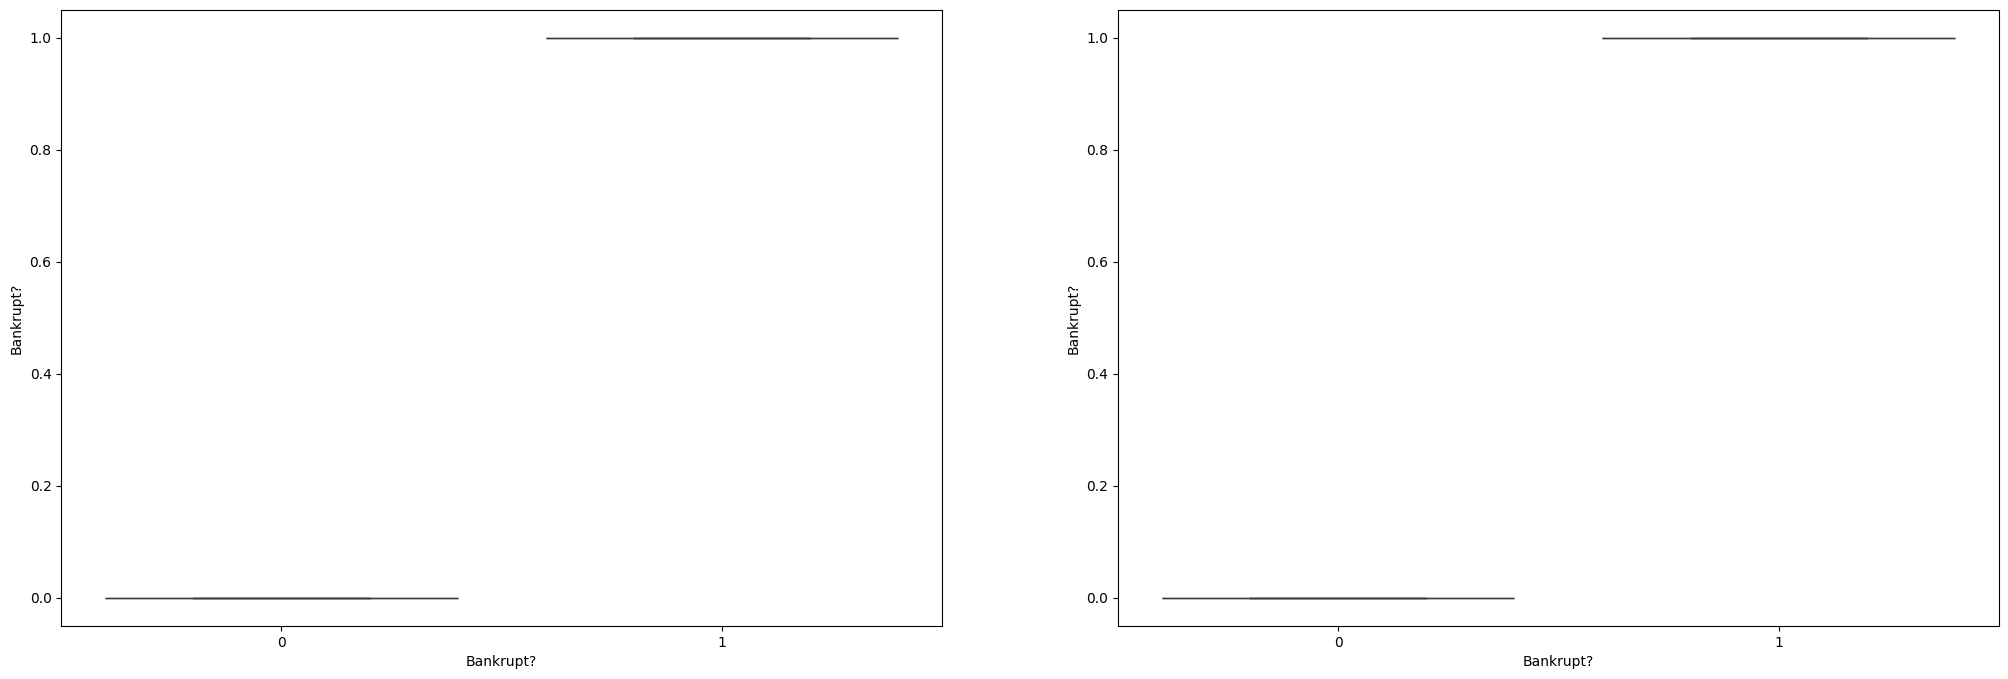

 ROA(C) before interest and depreciation before interest


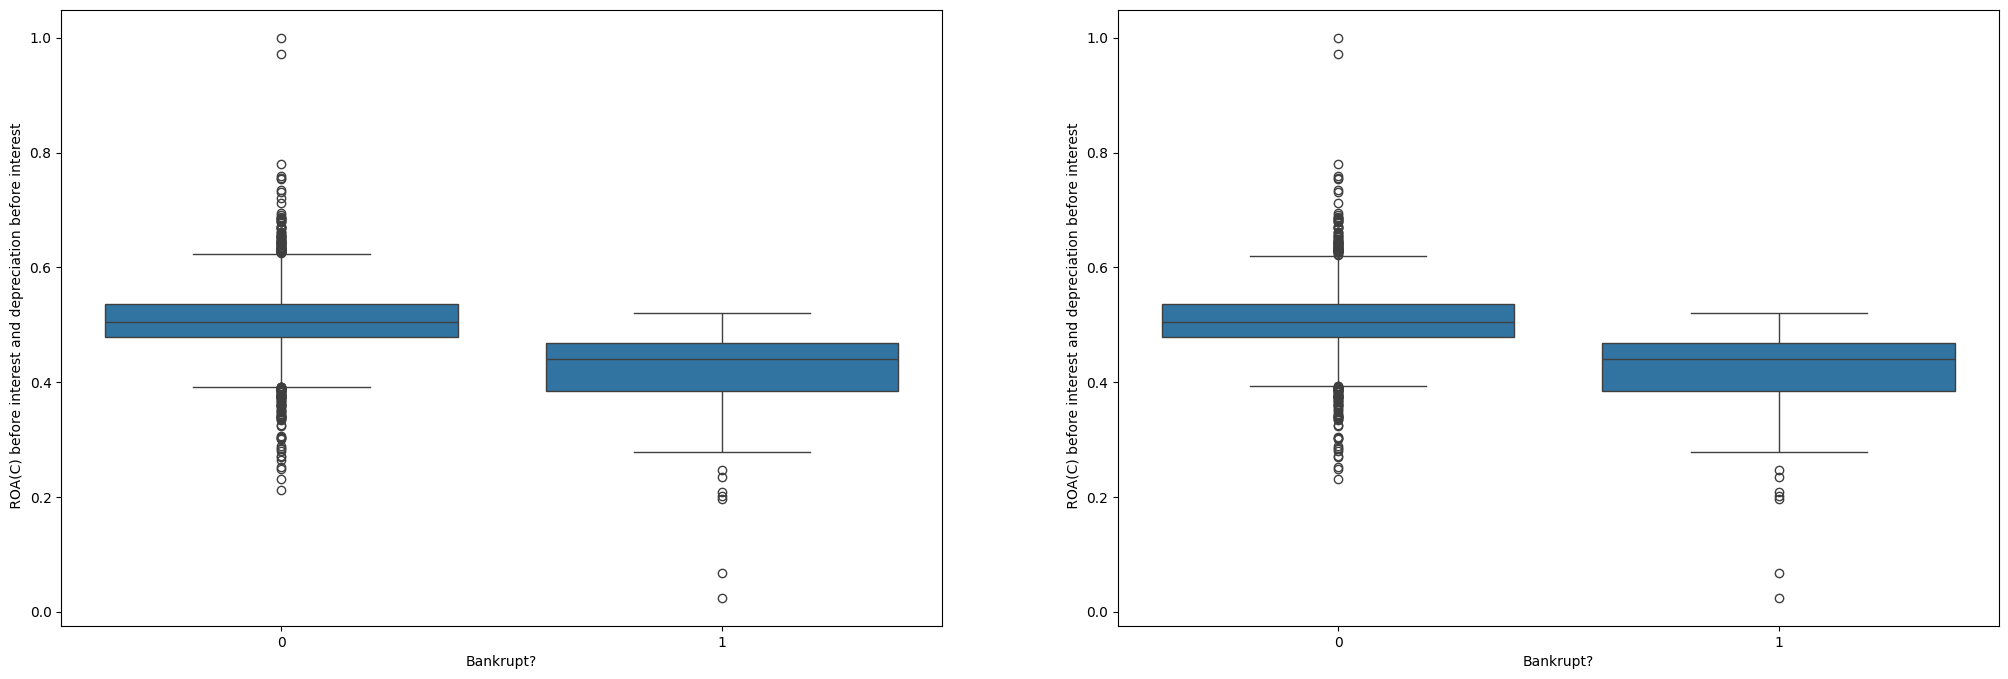

 ROA(A) before interest and % after tax


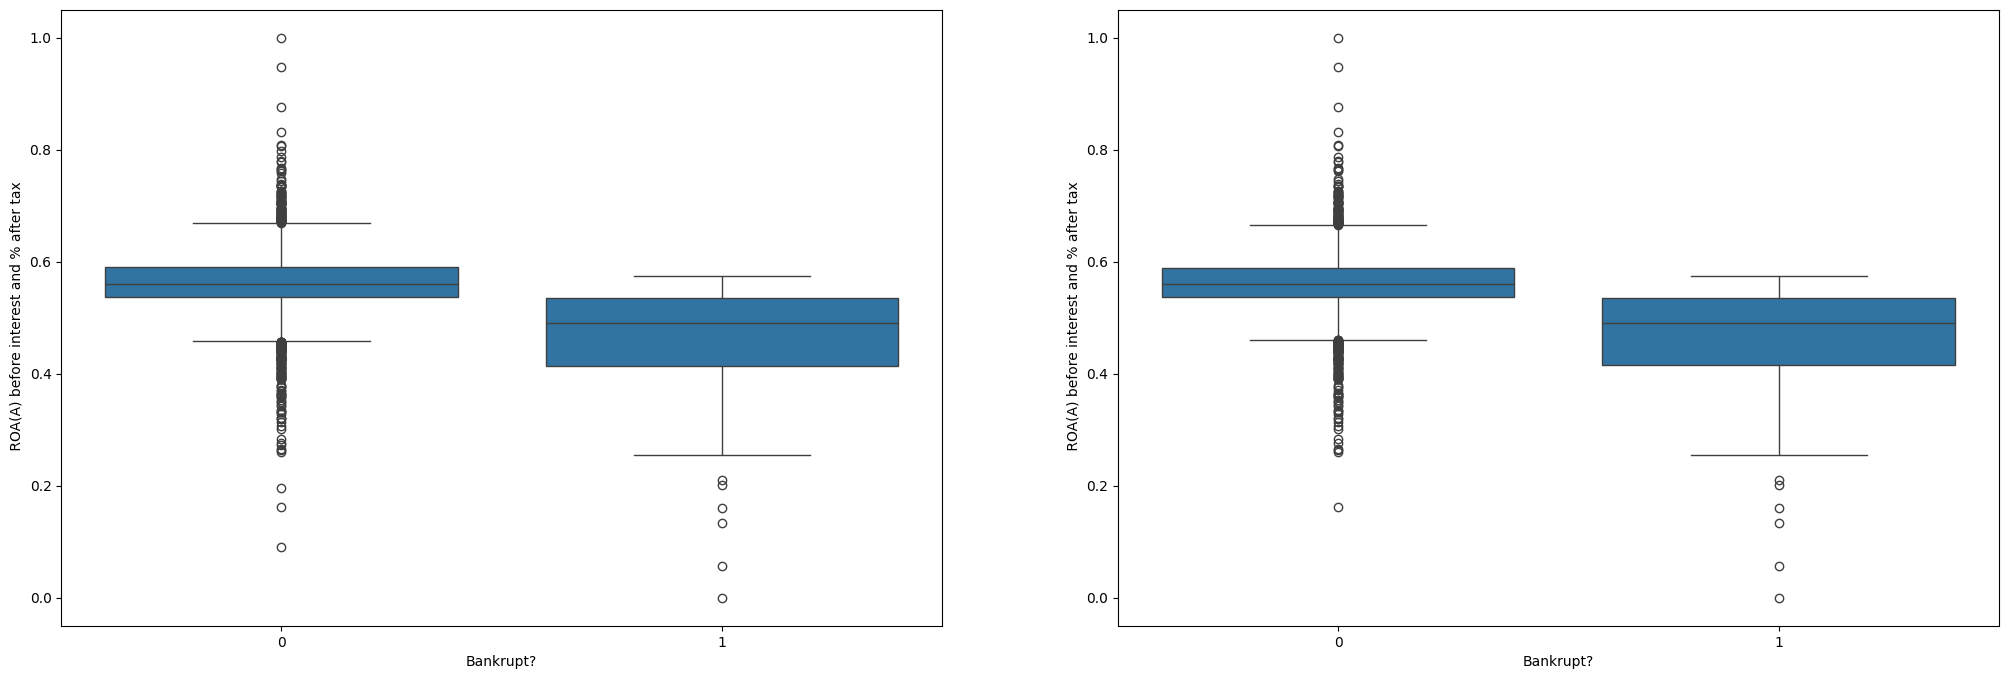

 ROA(B) before interest and depreciation after tax


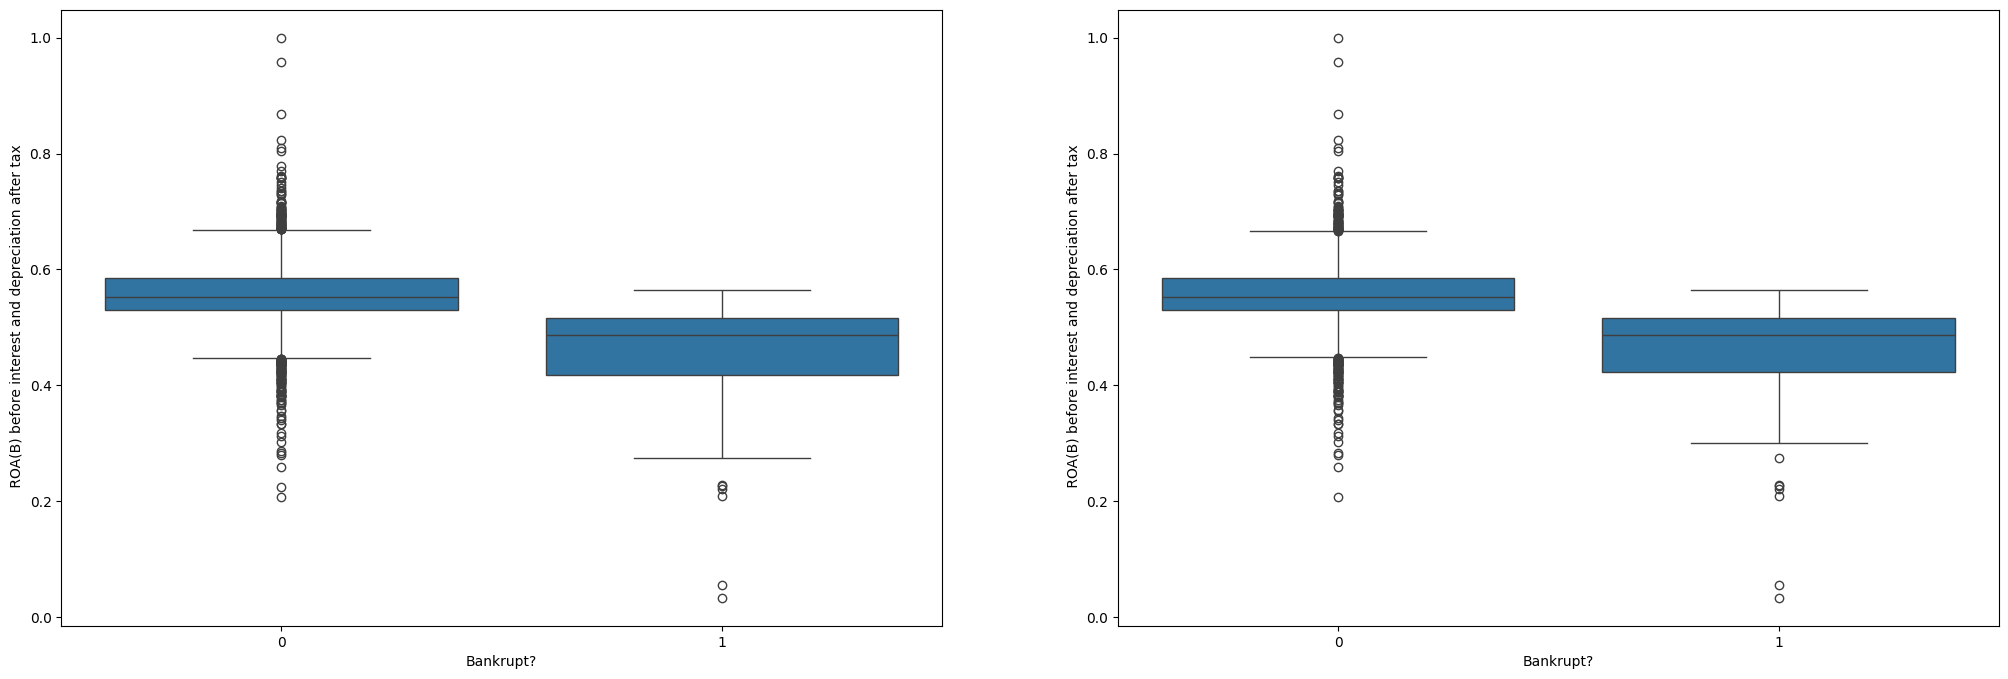

 Operating Gross Margin


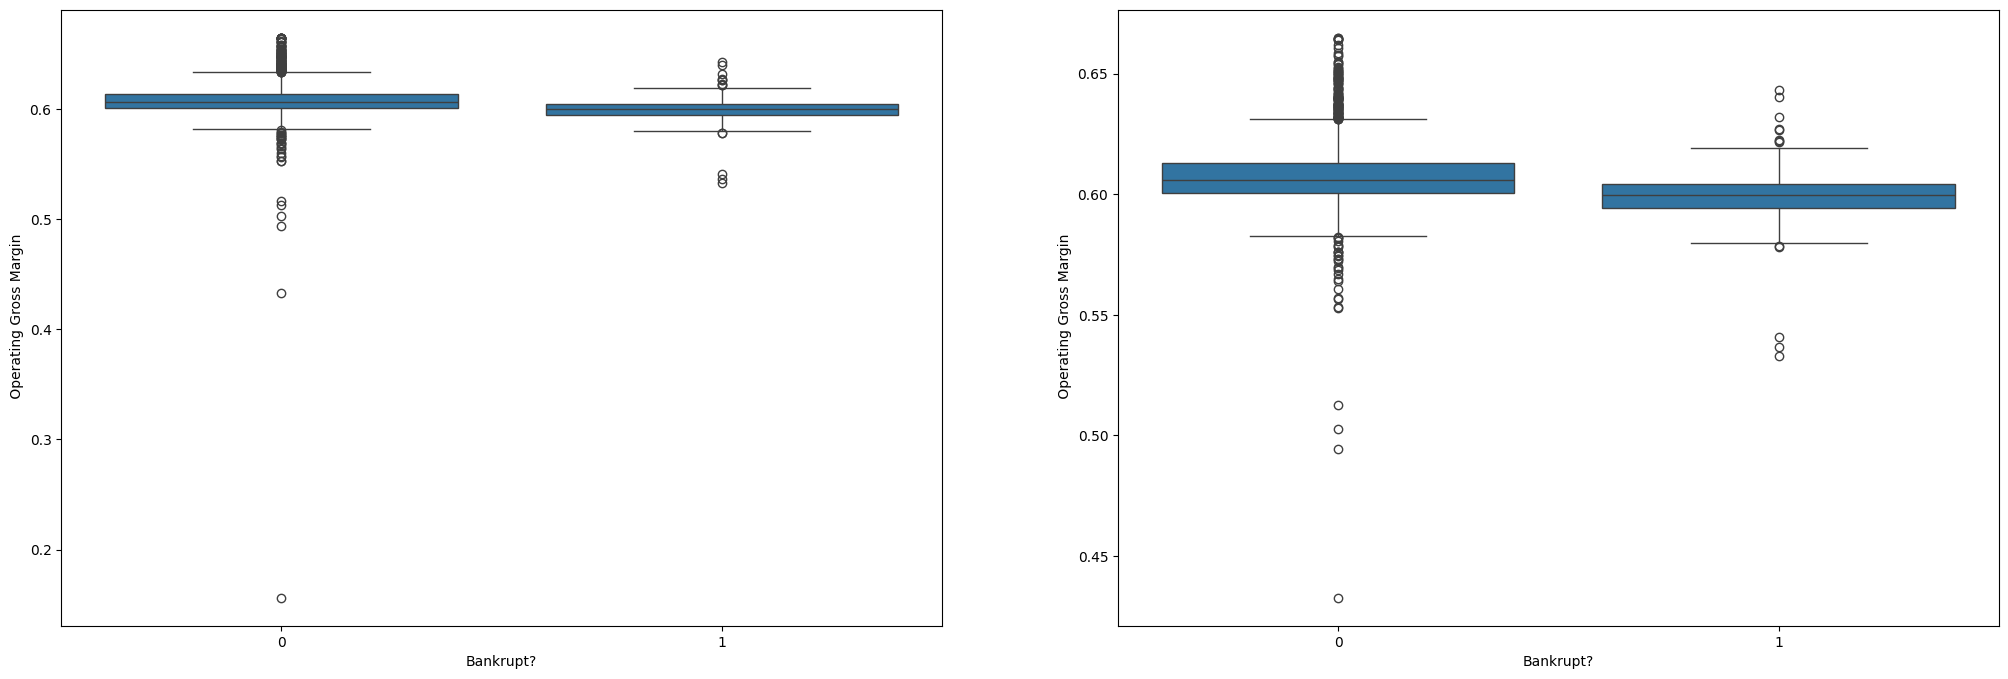

 Realized Sales Gross Margin


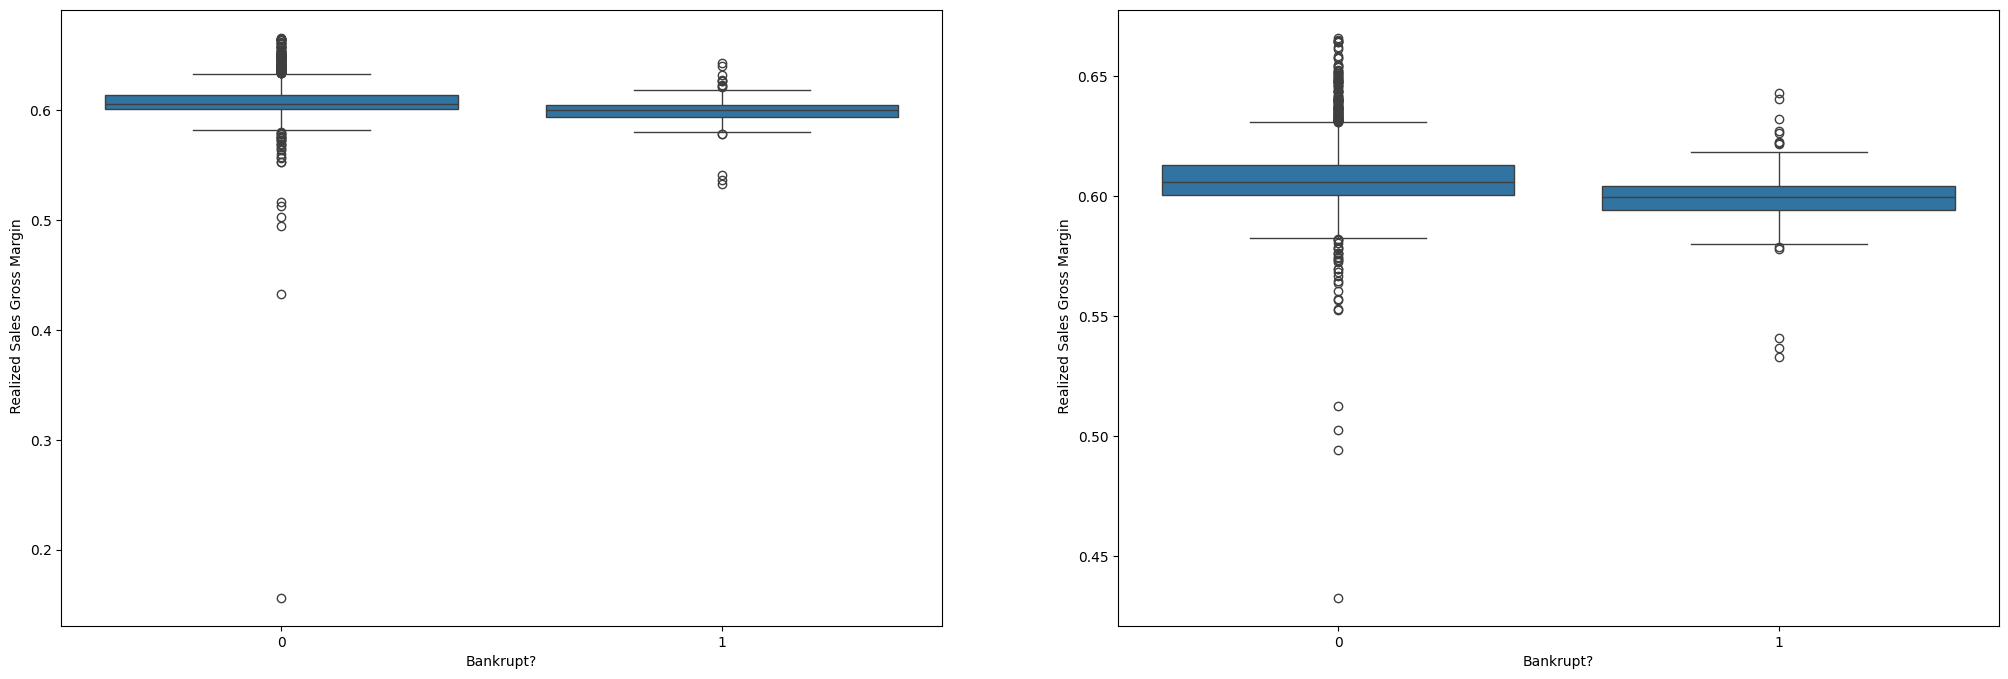

 Operating Profit Rate


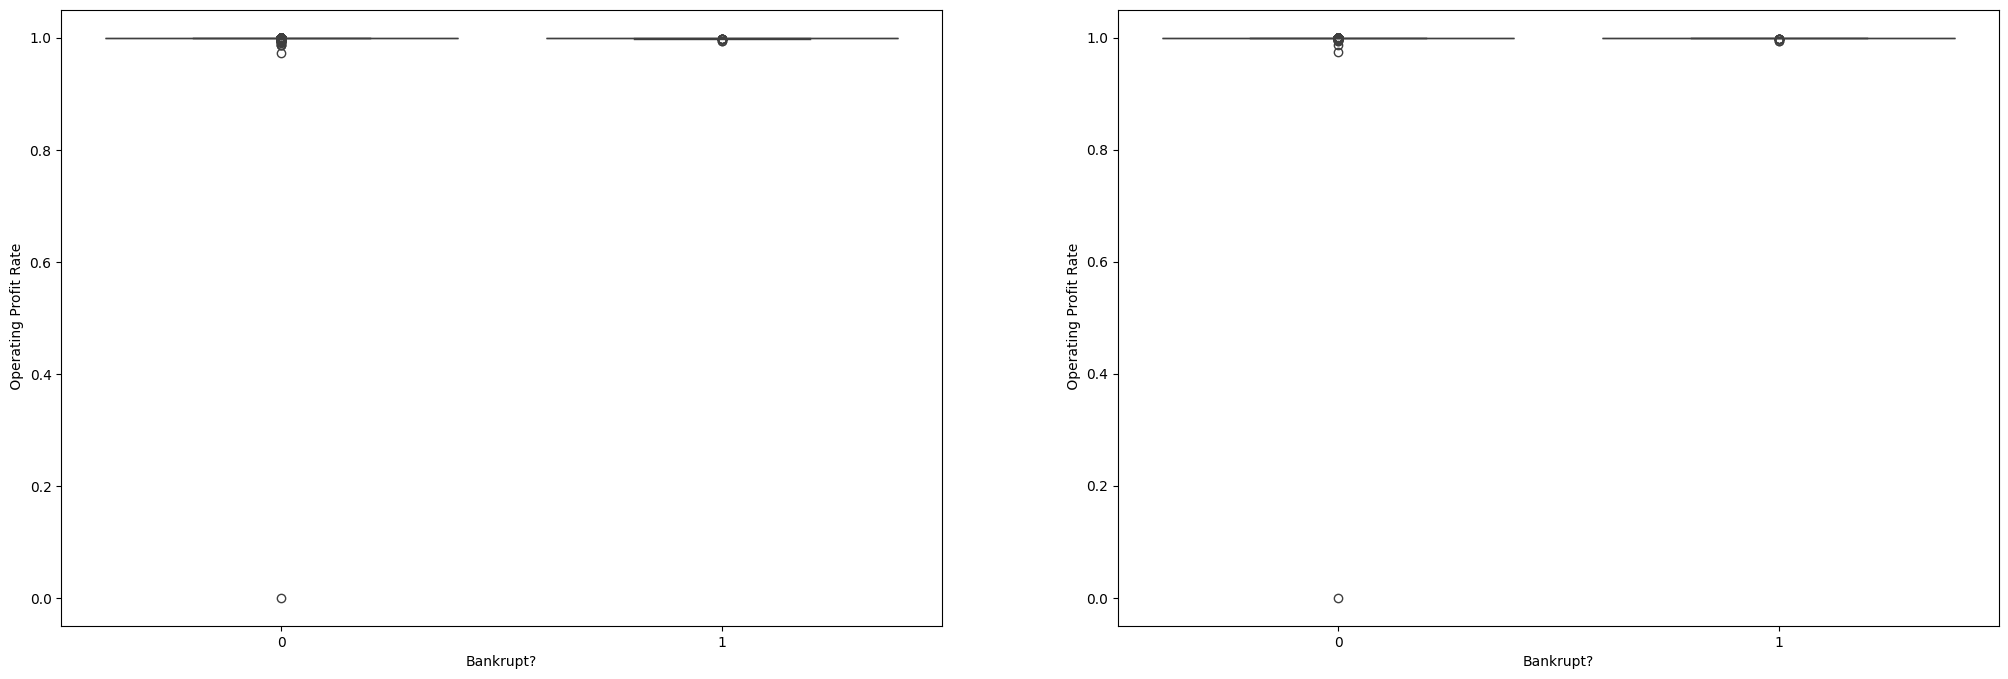

 Pre-tax net Interest Rate


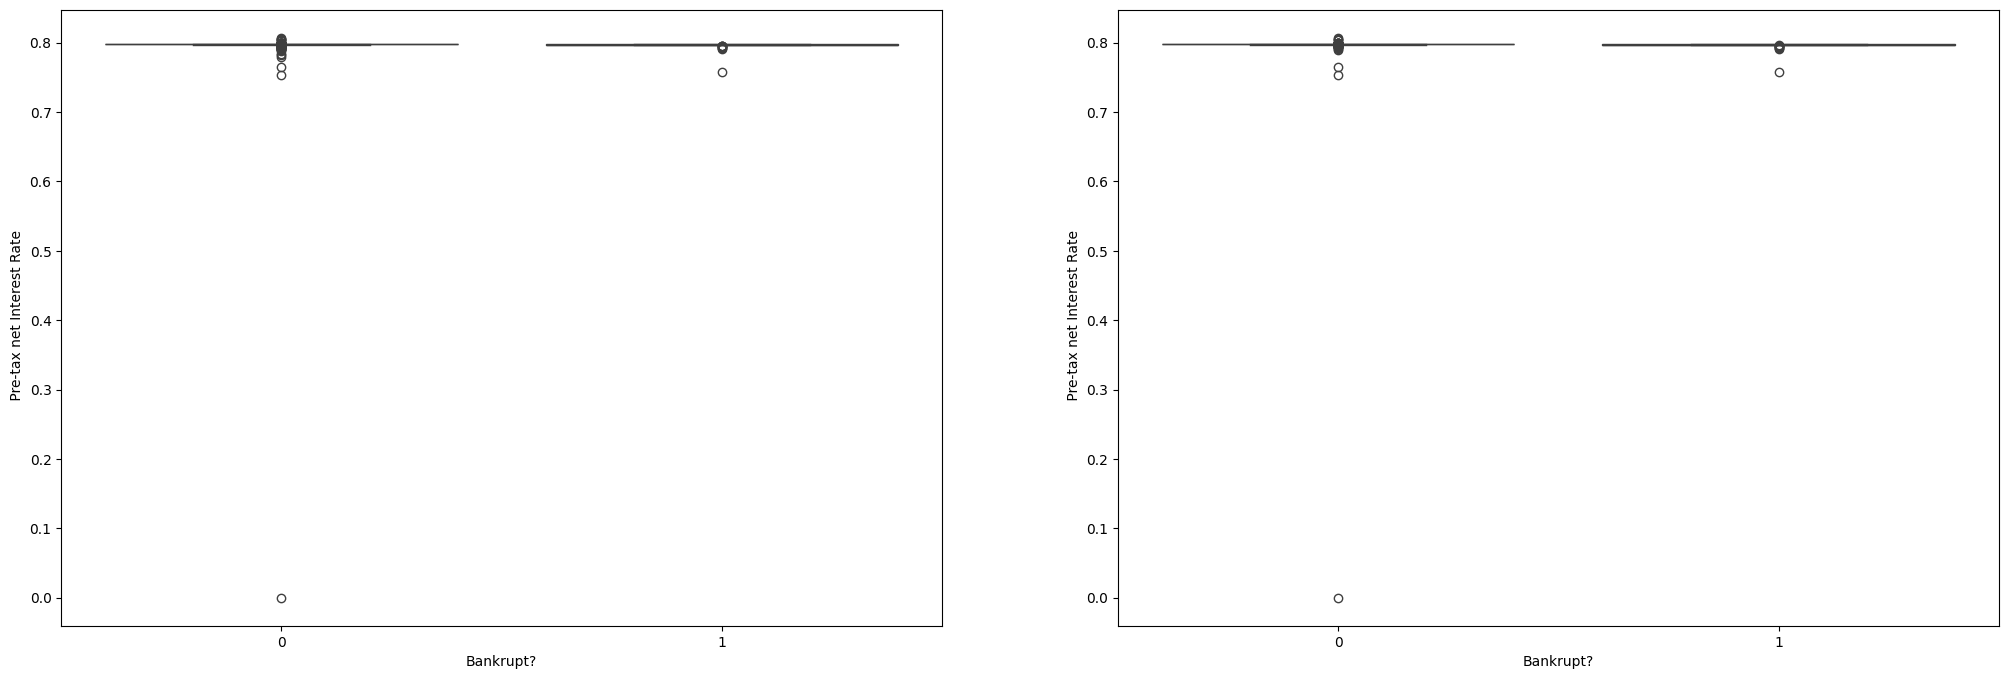

 After-tax net Interest Rate


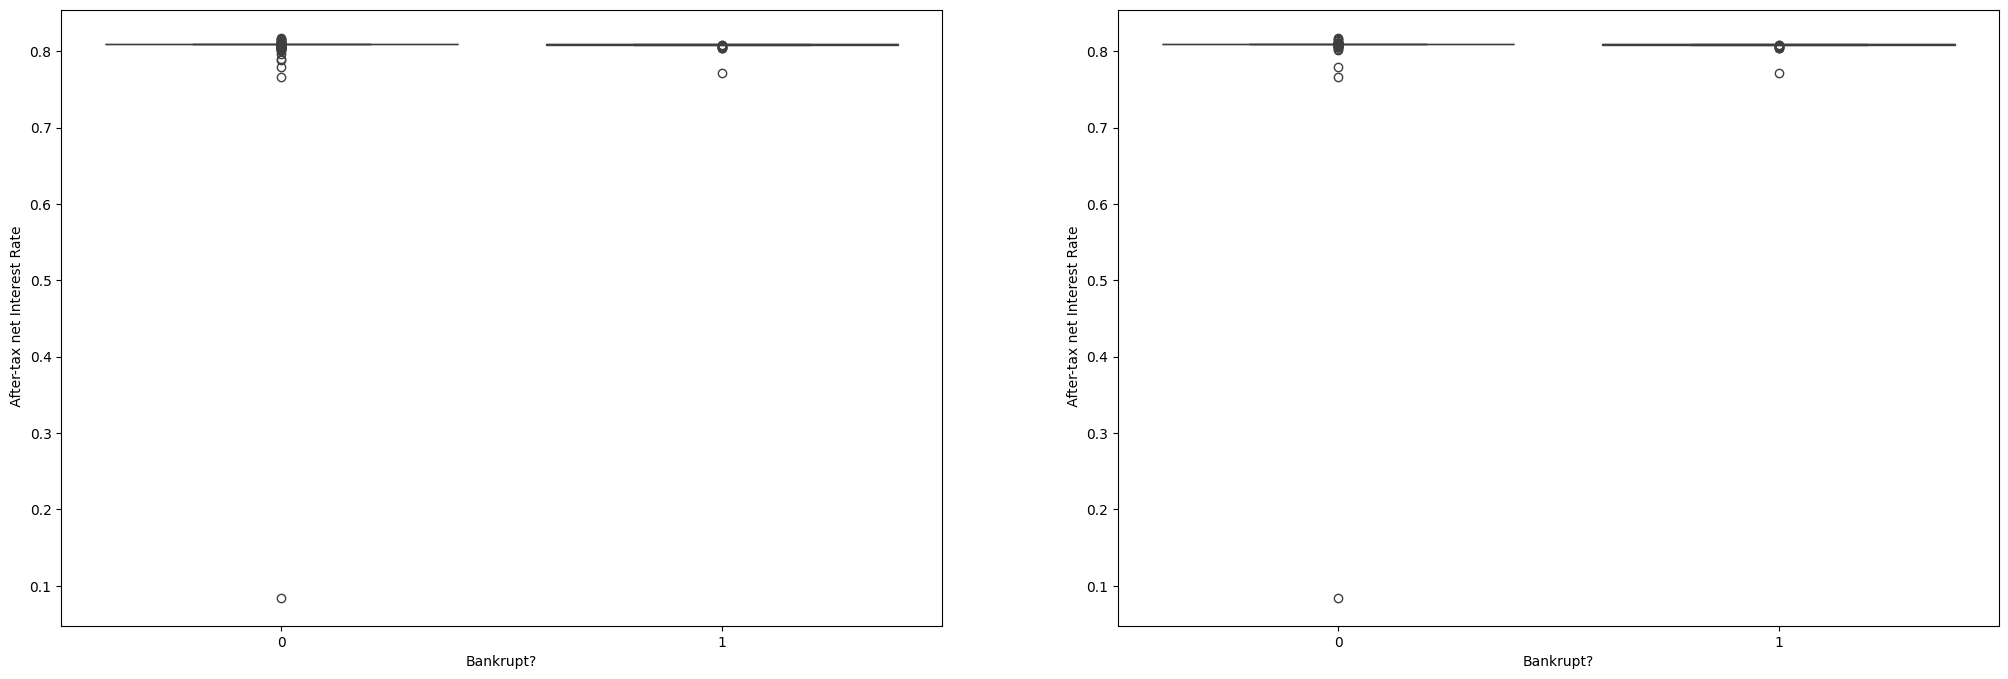

 Non-industry income and expenditure/revenue


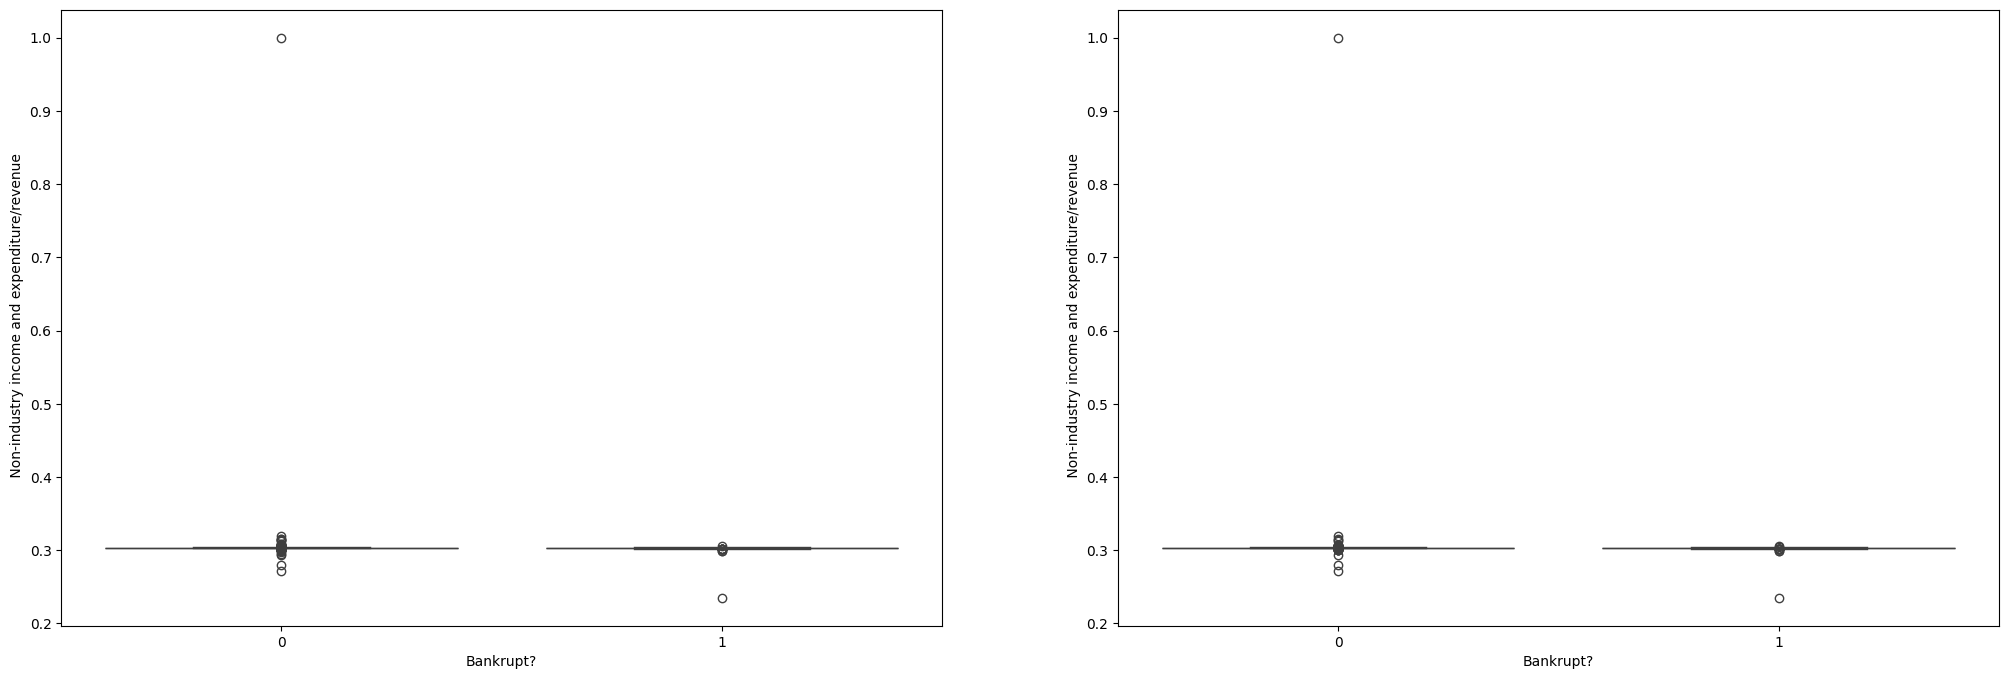

 Continuous interest rate (after tax)


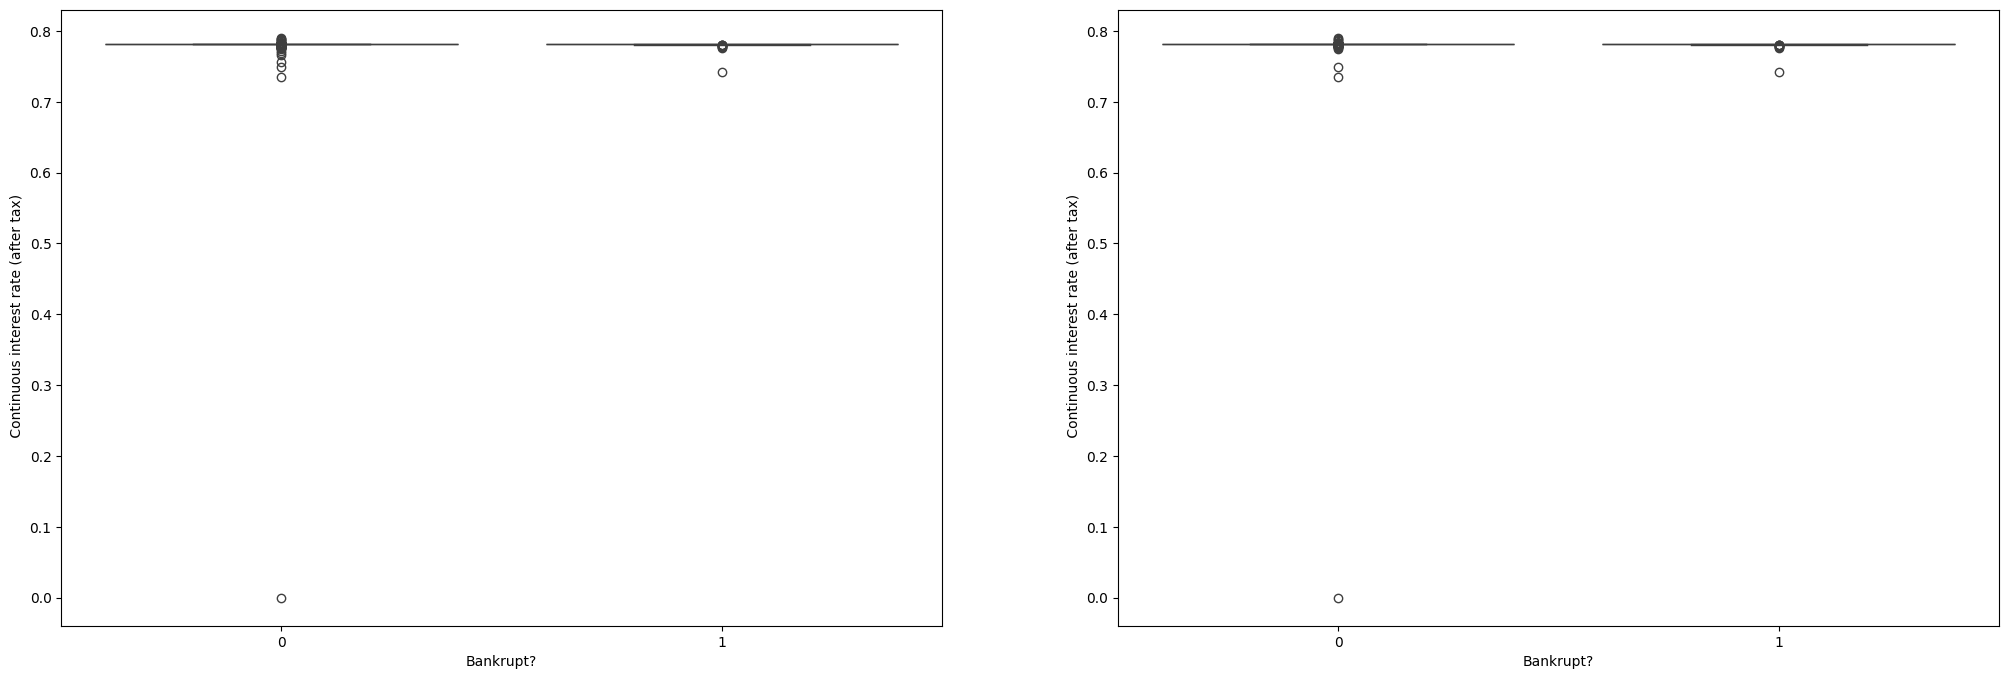

 Operating Expense Rate


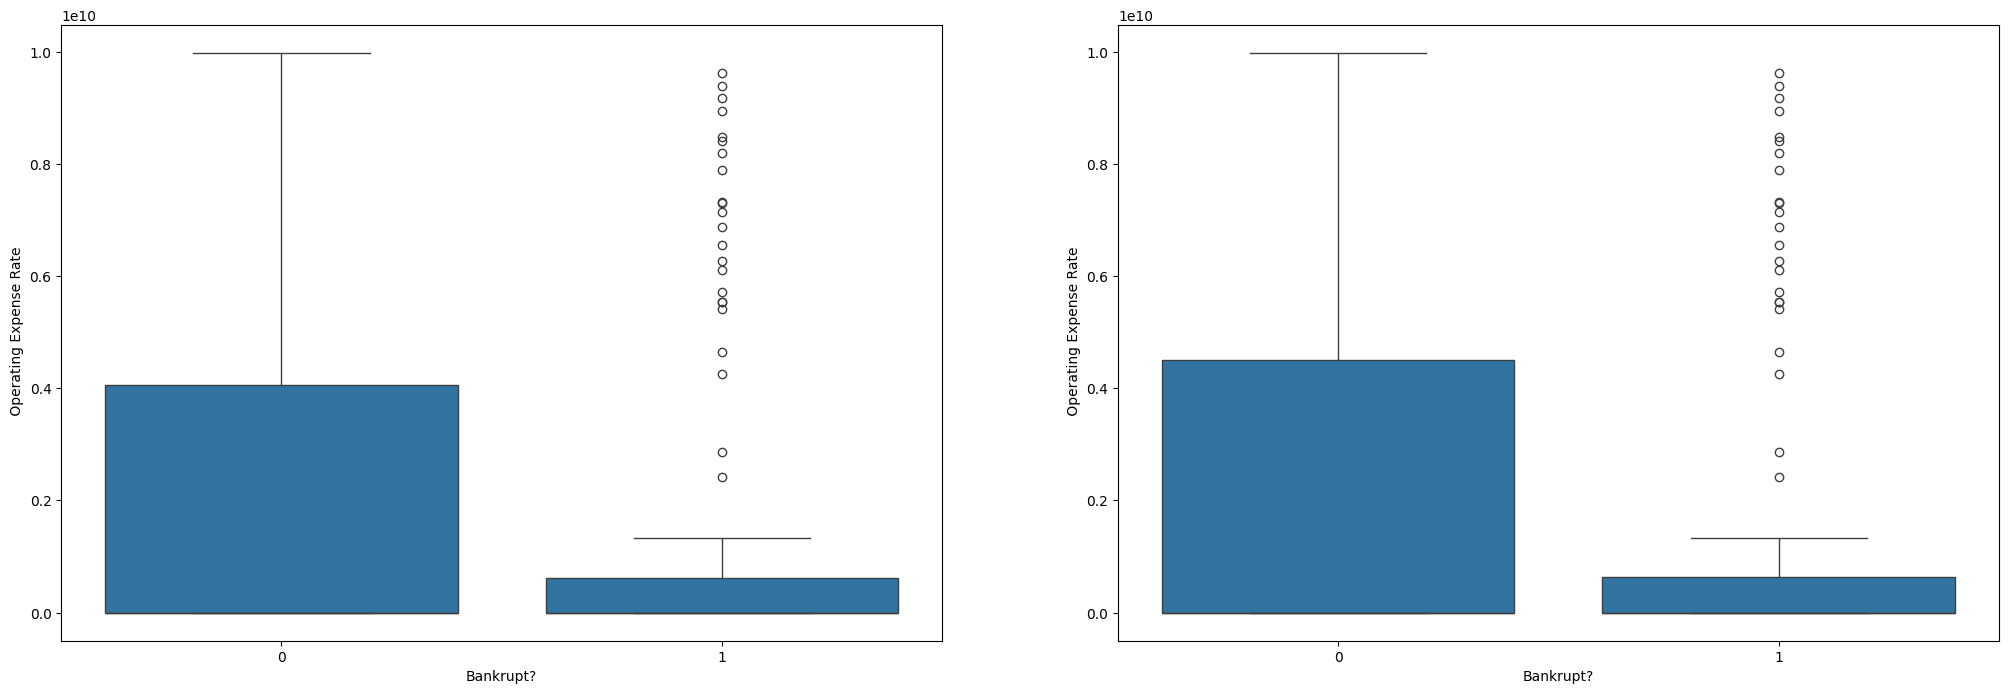

 Research and development expense rate


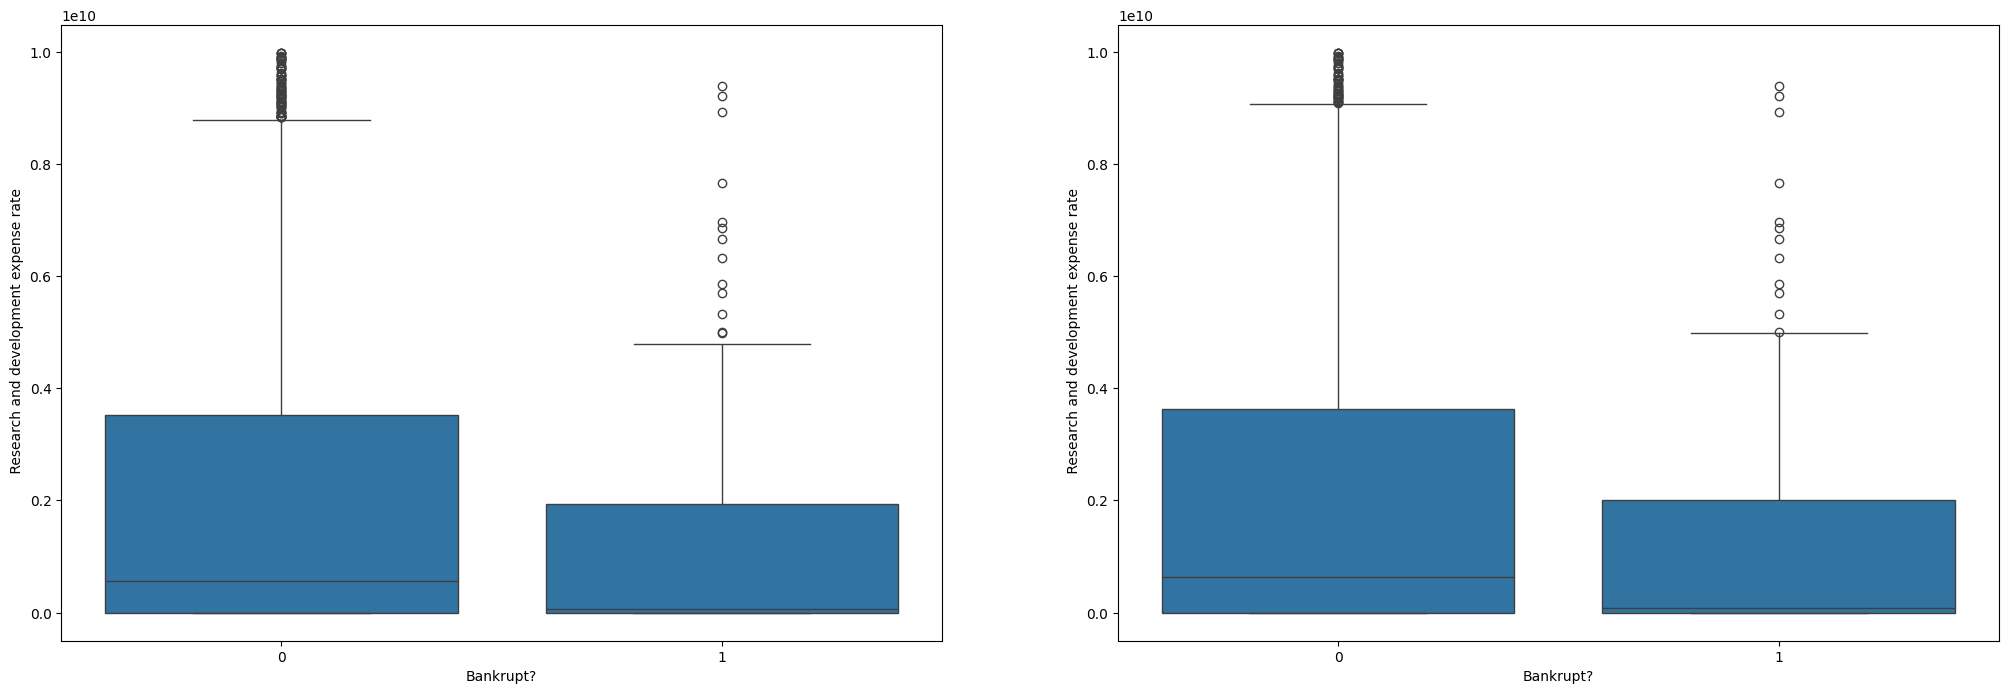

 Cash flow rate


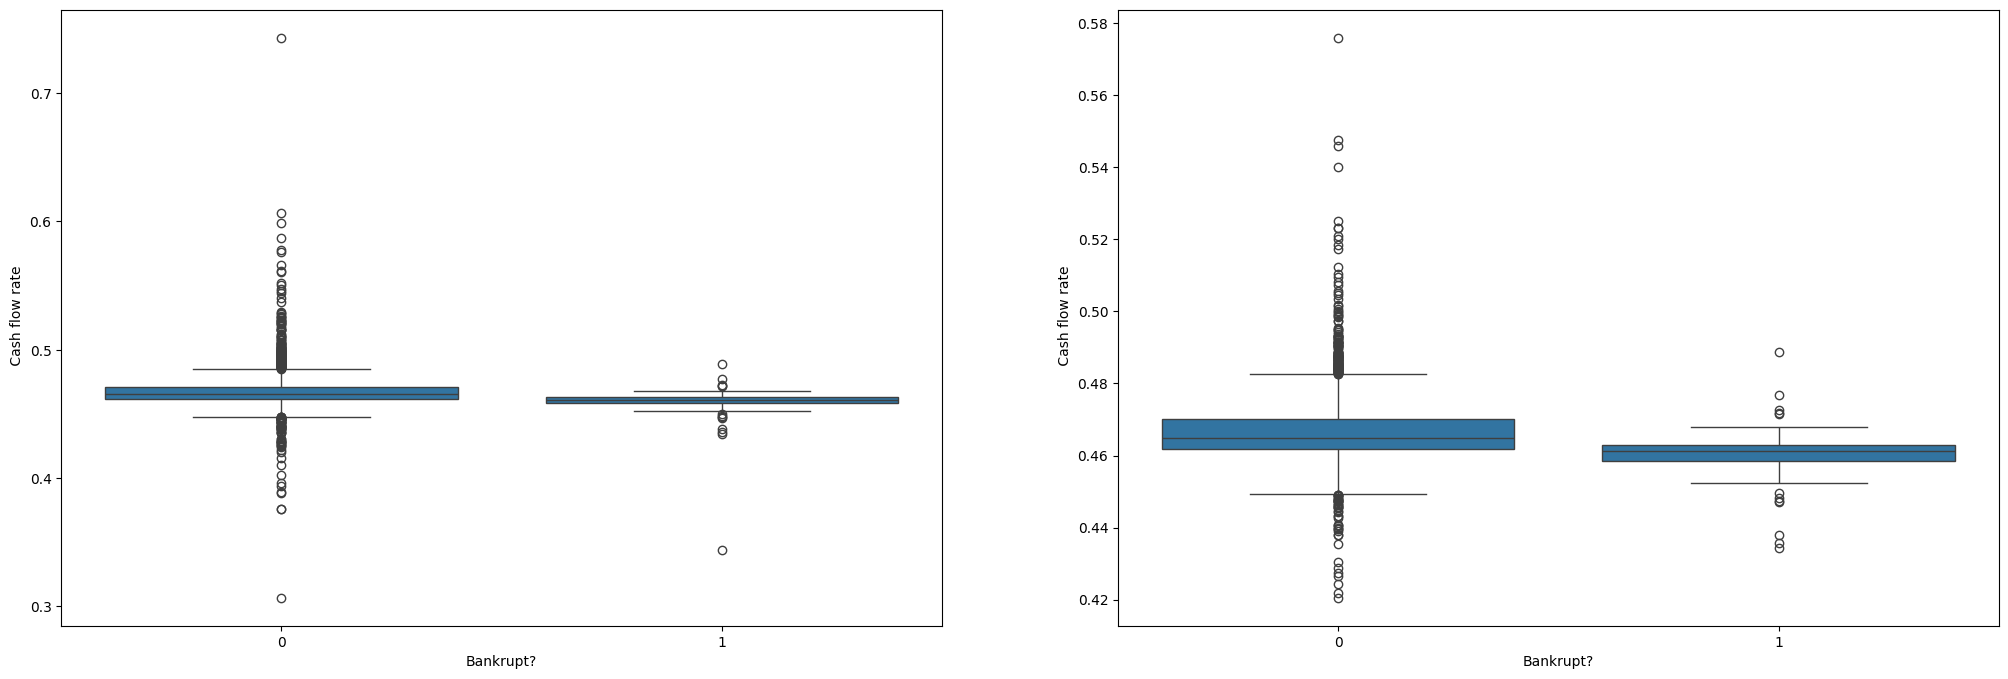

 Interest-bearing debt interest rate


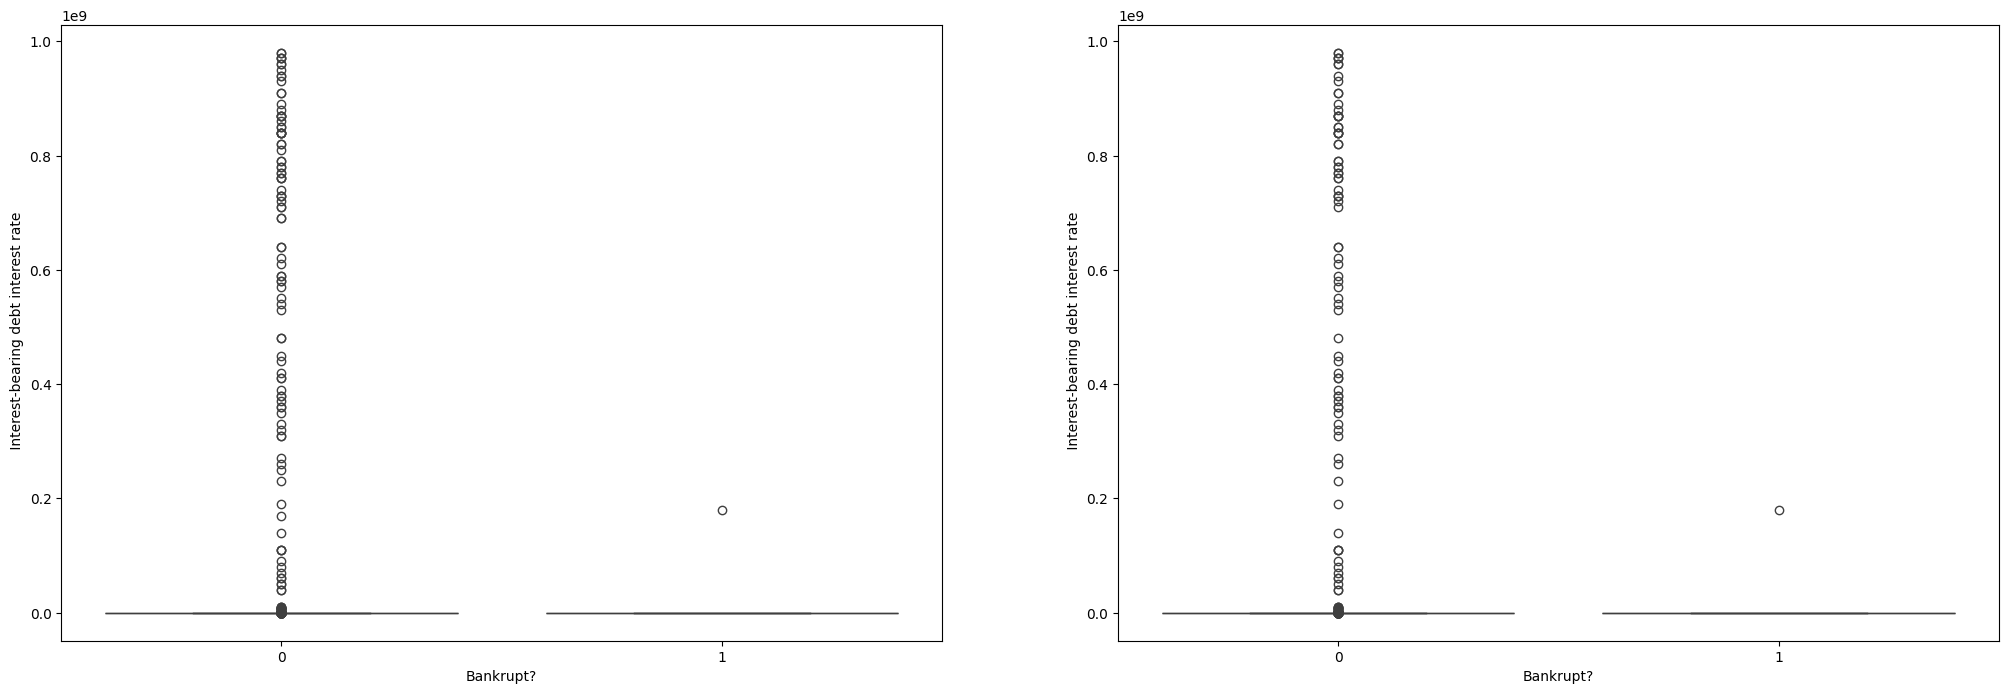

 Tax rate (A)


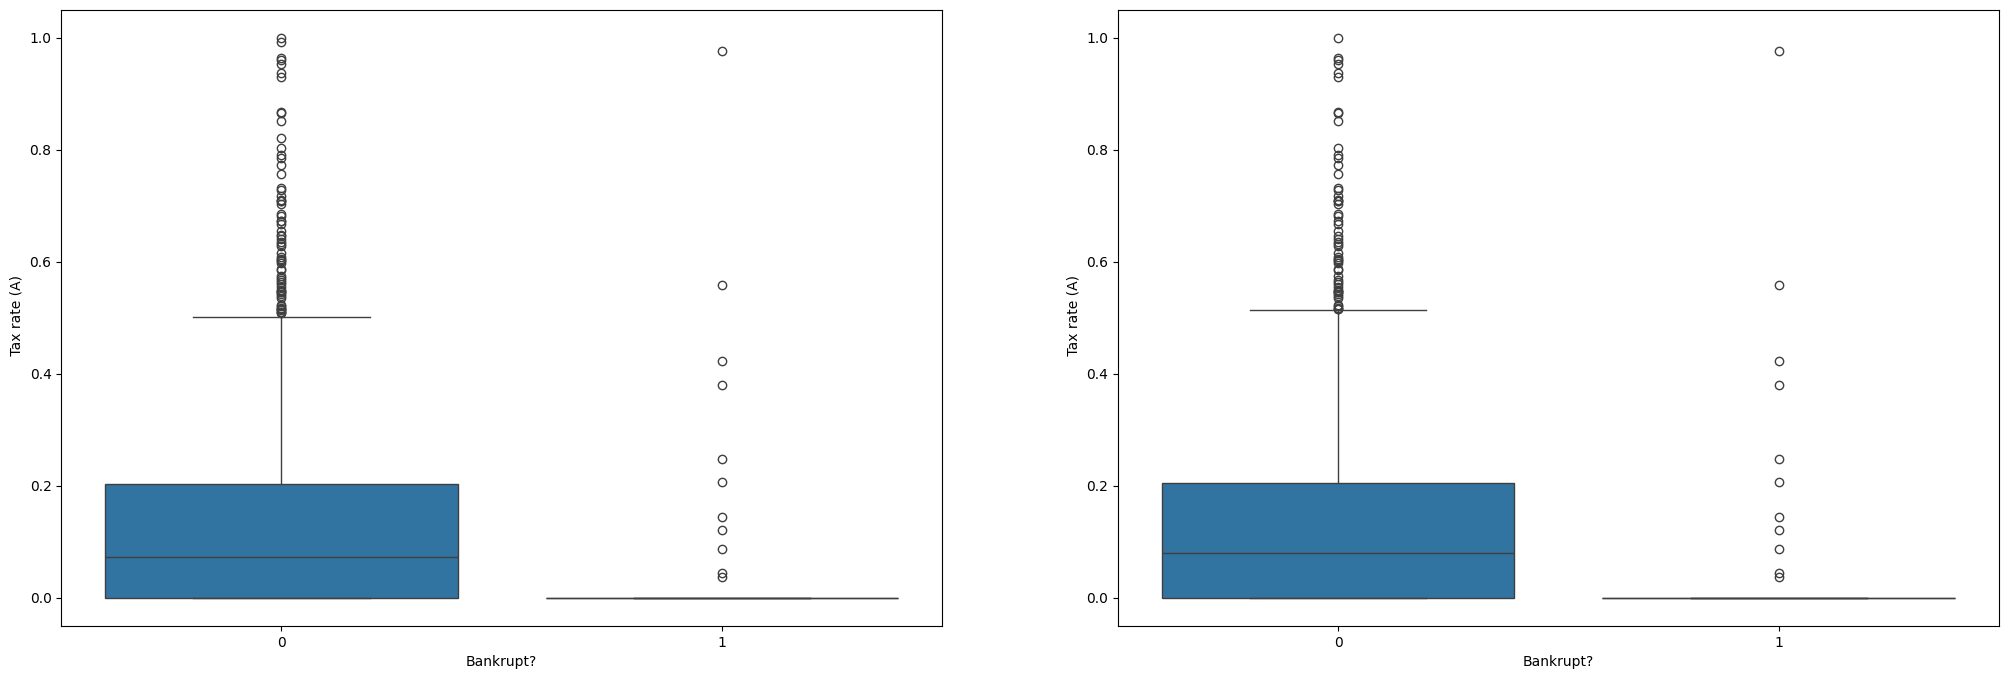

 Net Value Per Share (B)


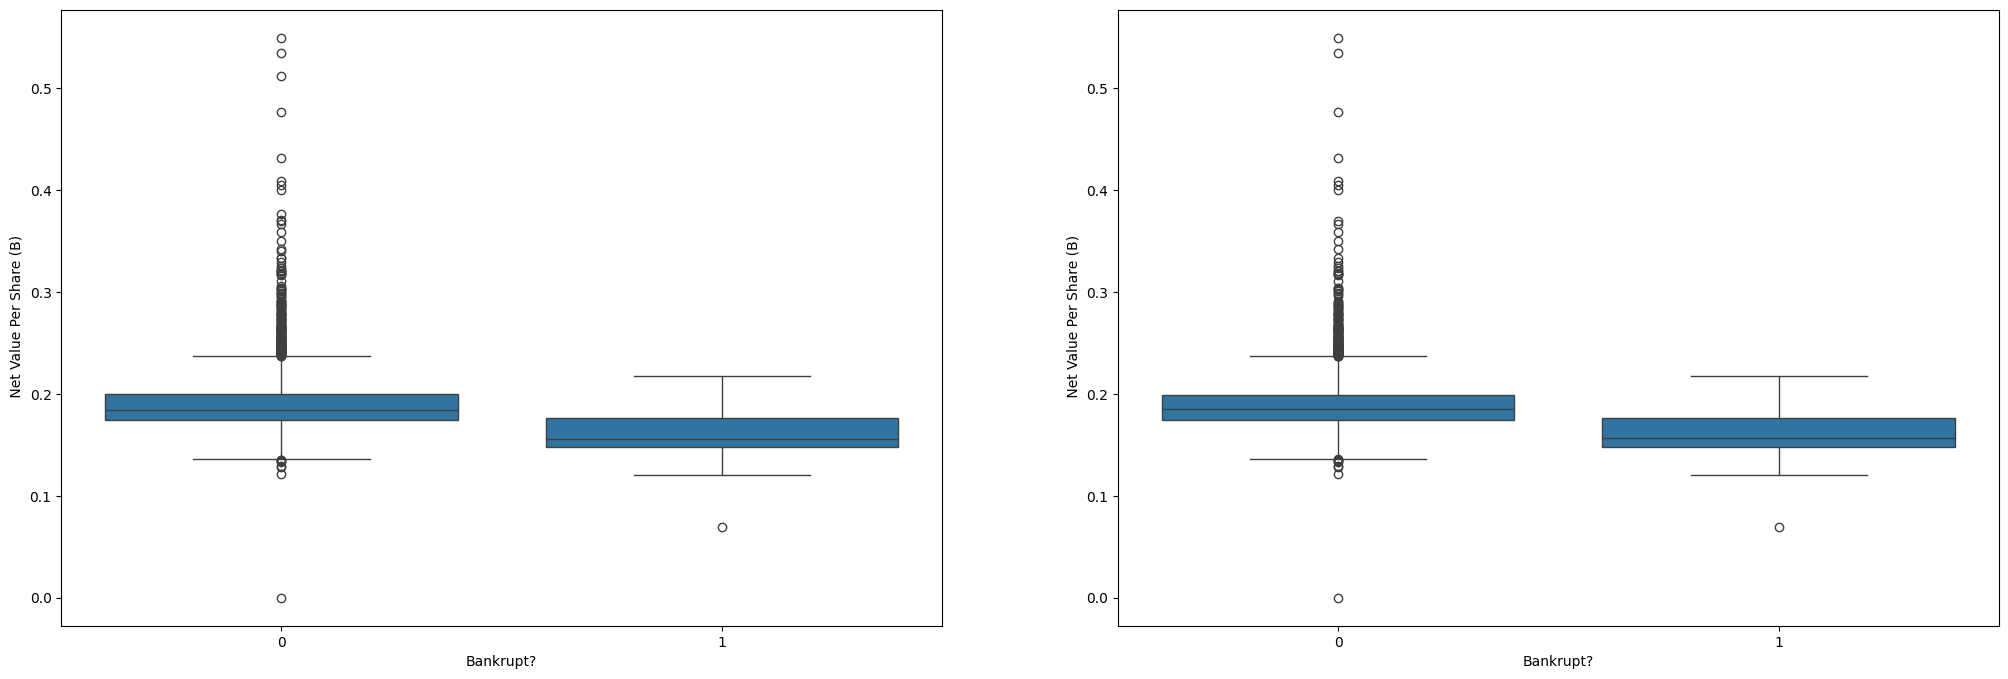

 Net Value Per Share (A)


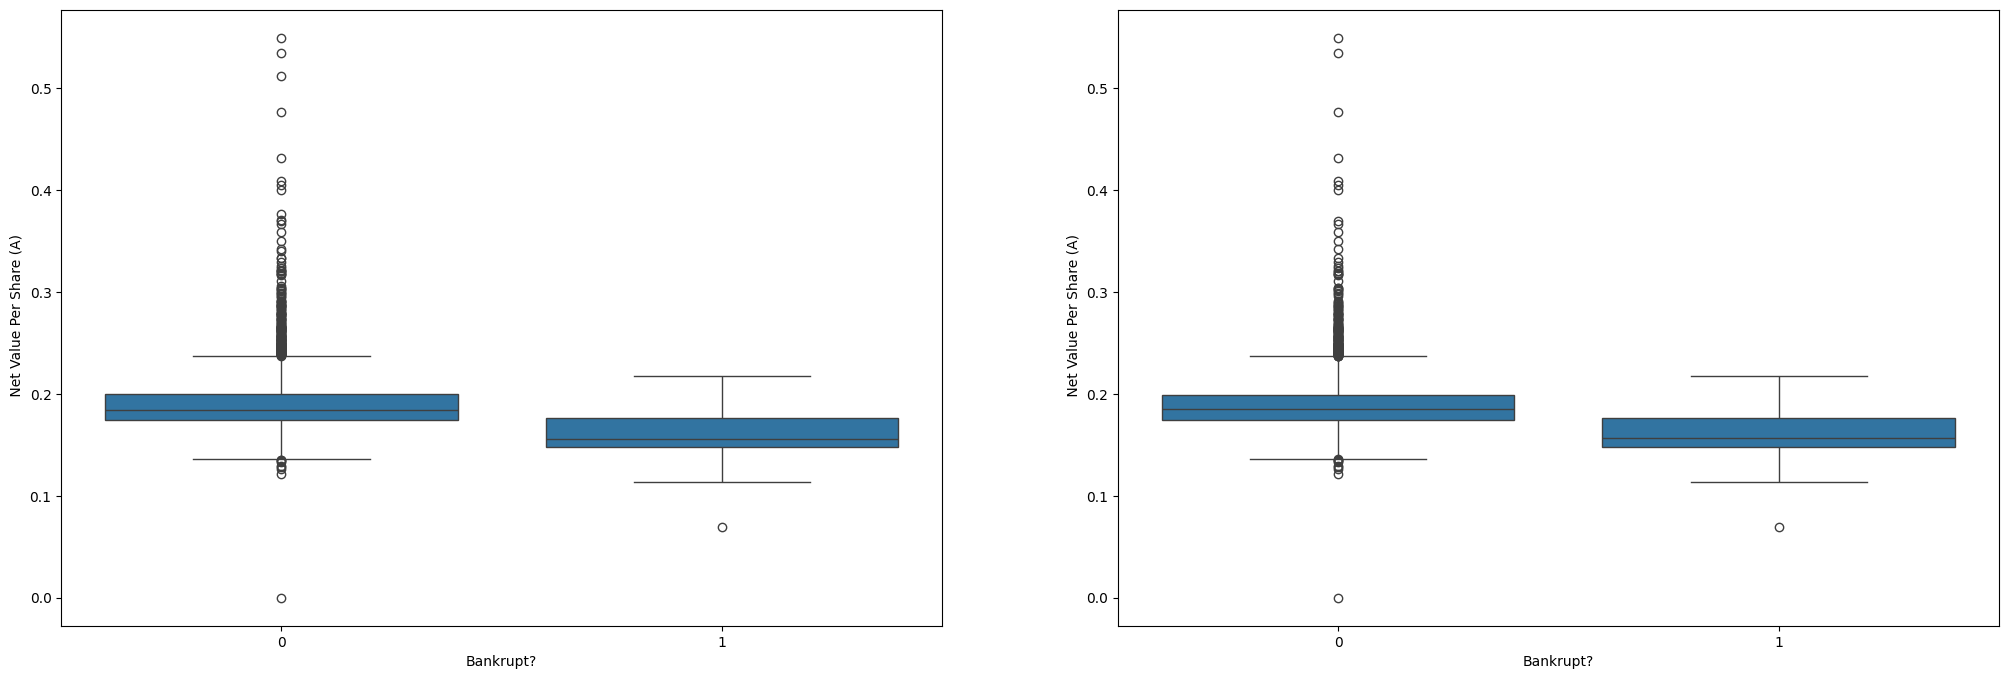

 Net Value Per Share (C)


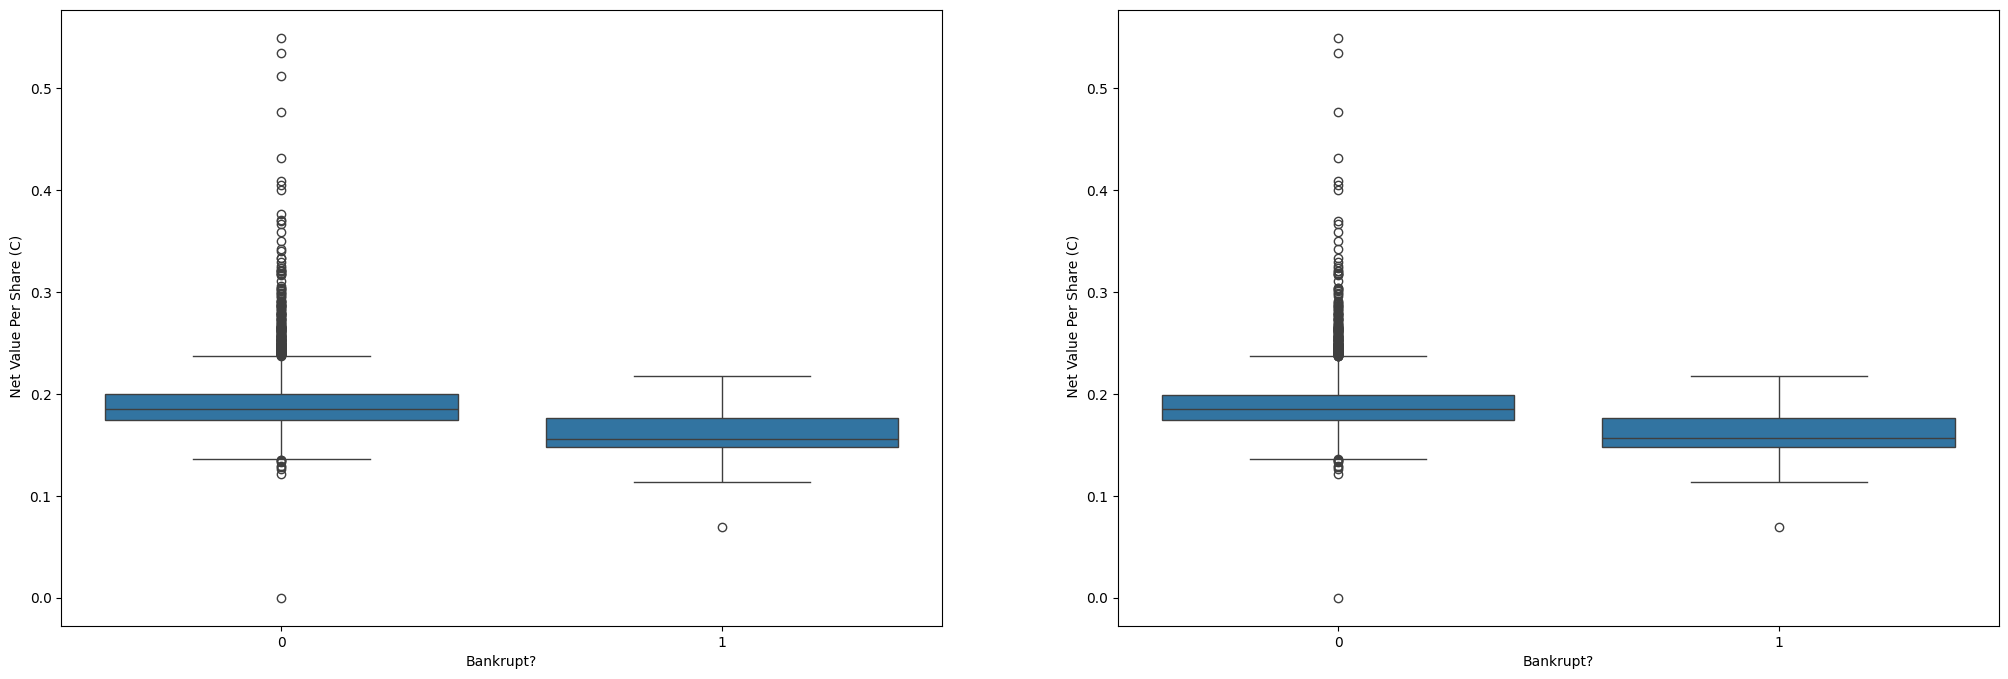

 Persistent EPS in the Last Four Seasons


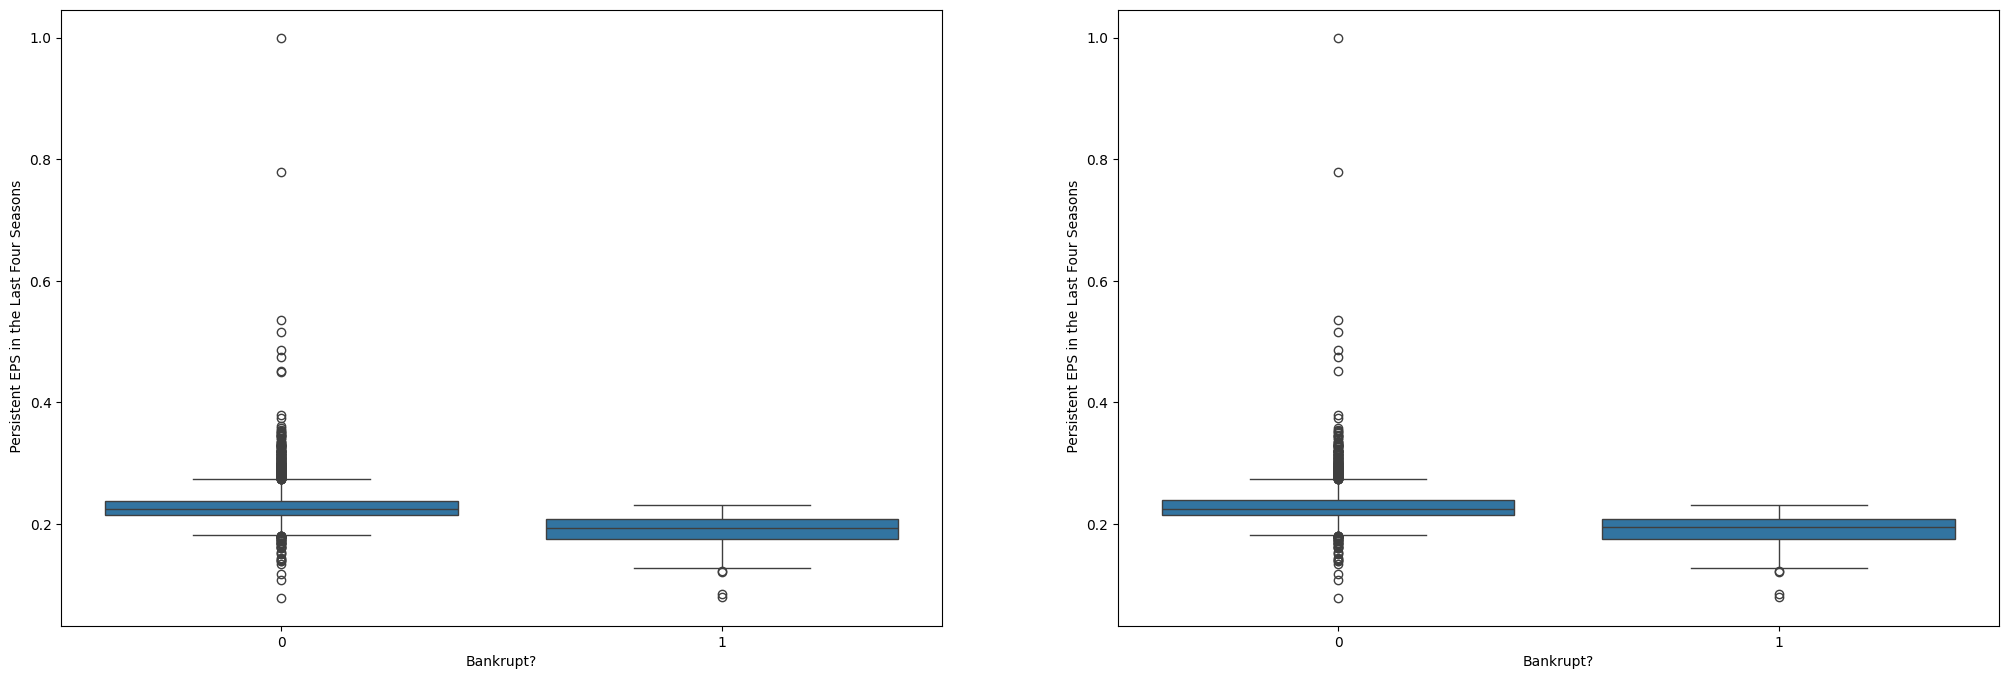

In [50]:
# boxplot
temp = db_train.columns

for i in range(20):
    plt.subplots(ncols=2, figsize=(25,8))
    sns.boxplot(x='Bankrupt?', y=db_train.columns[i], data=db_train, ax=plt.subplot(1, 2, 1))
    sns.boxplot(x='Bankrupt?', y=db_removed.columns[i], data=db_removed, ax=plt.subplot(1, 2, 2))
    print(temp[i])
    plt.show()

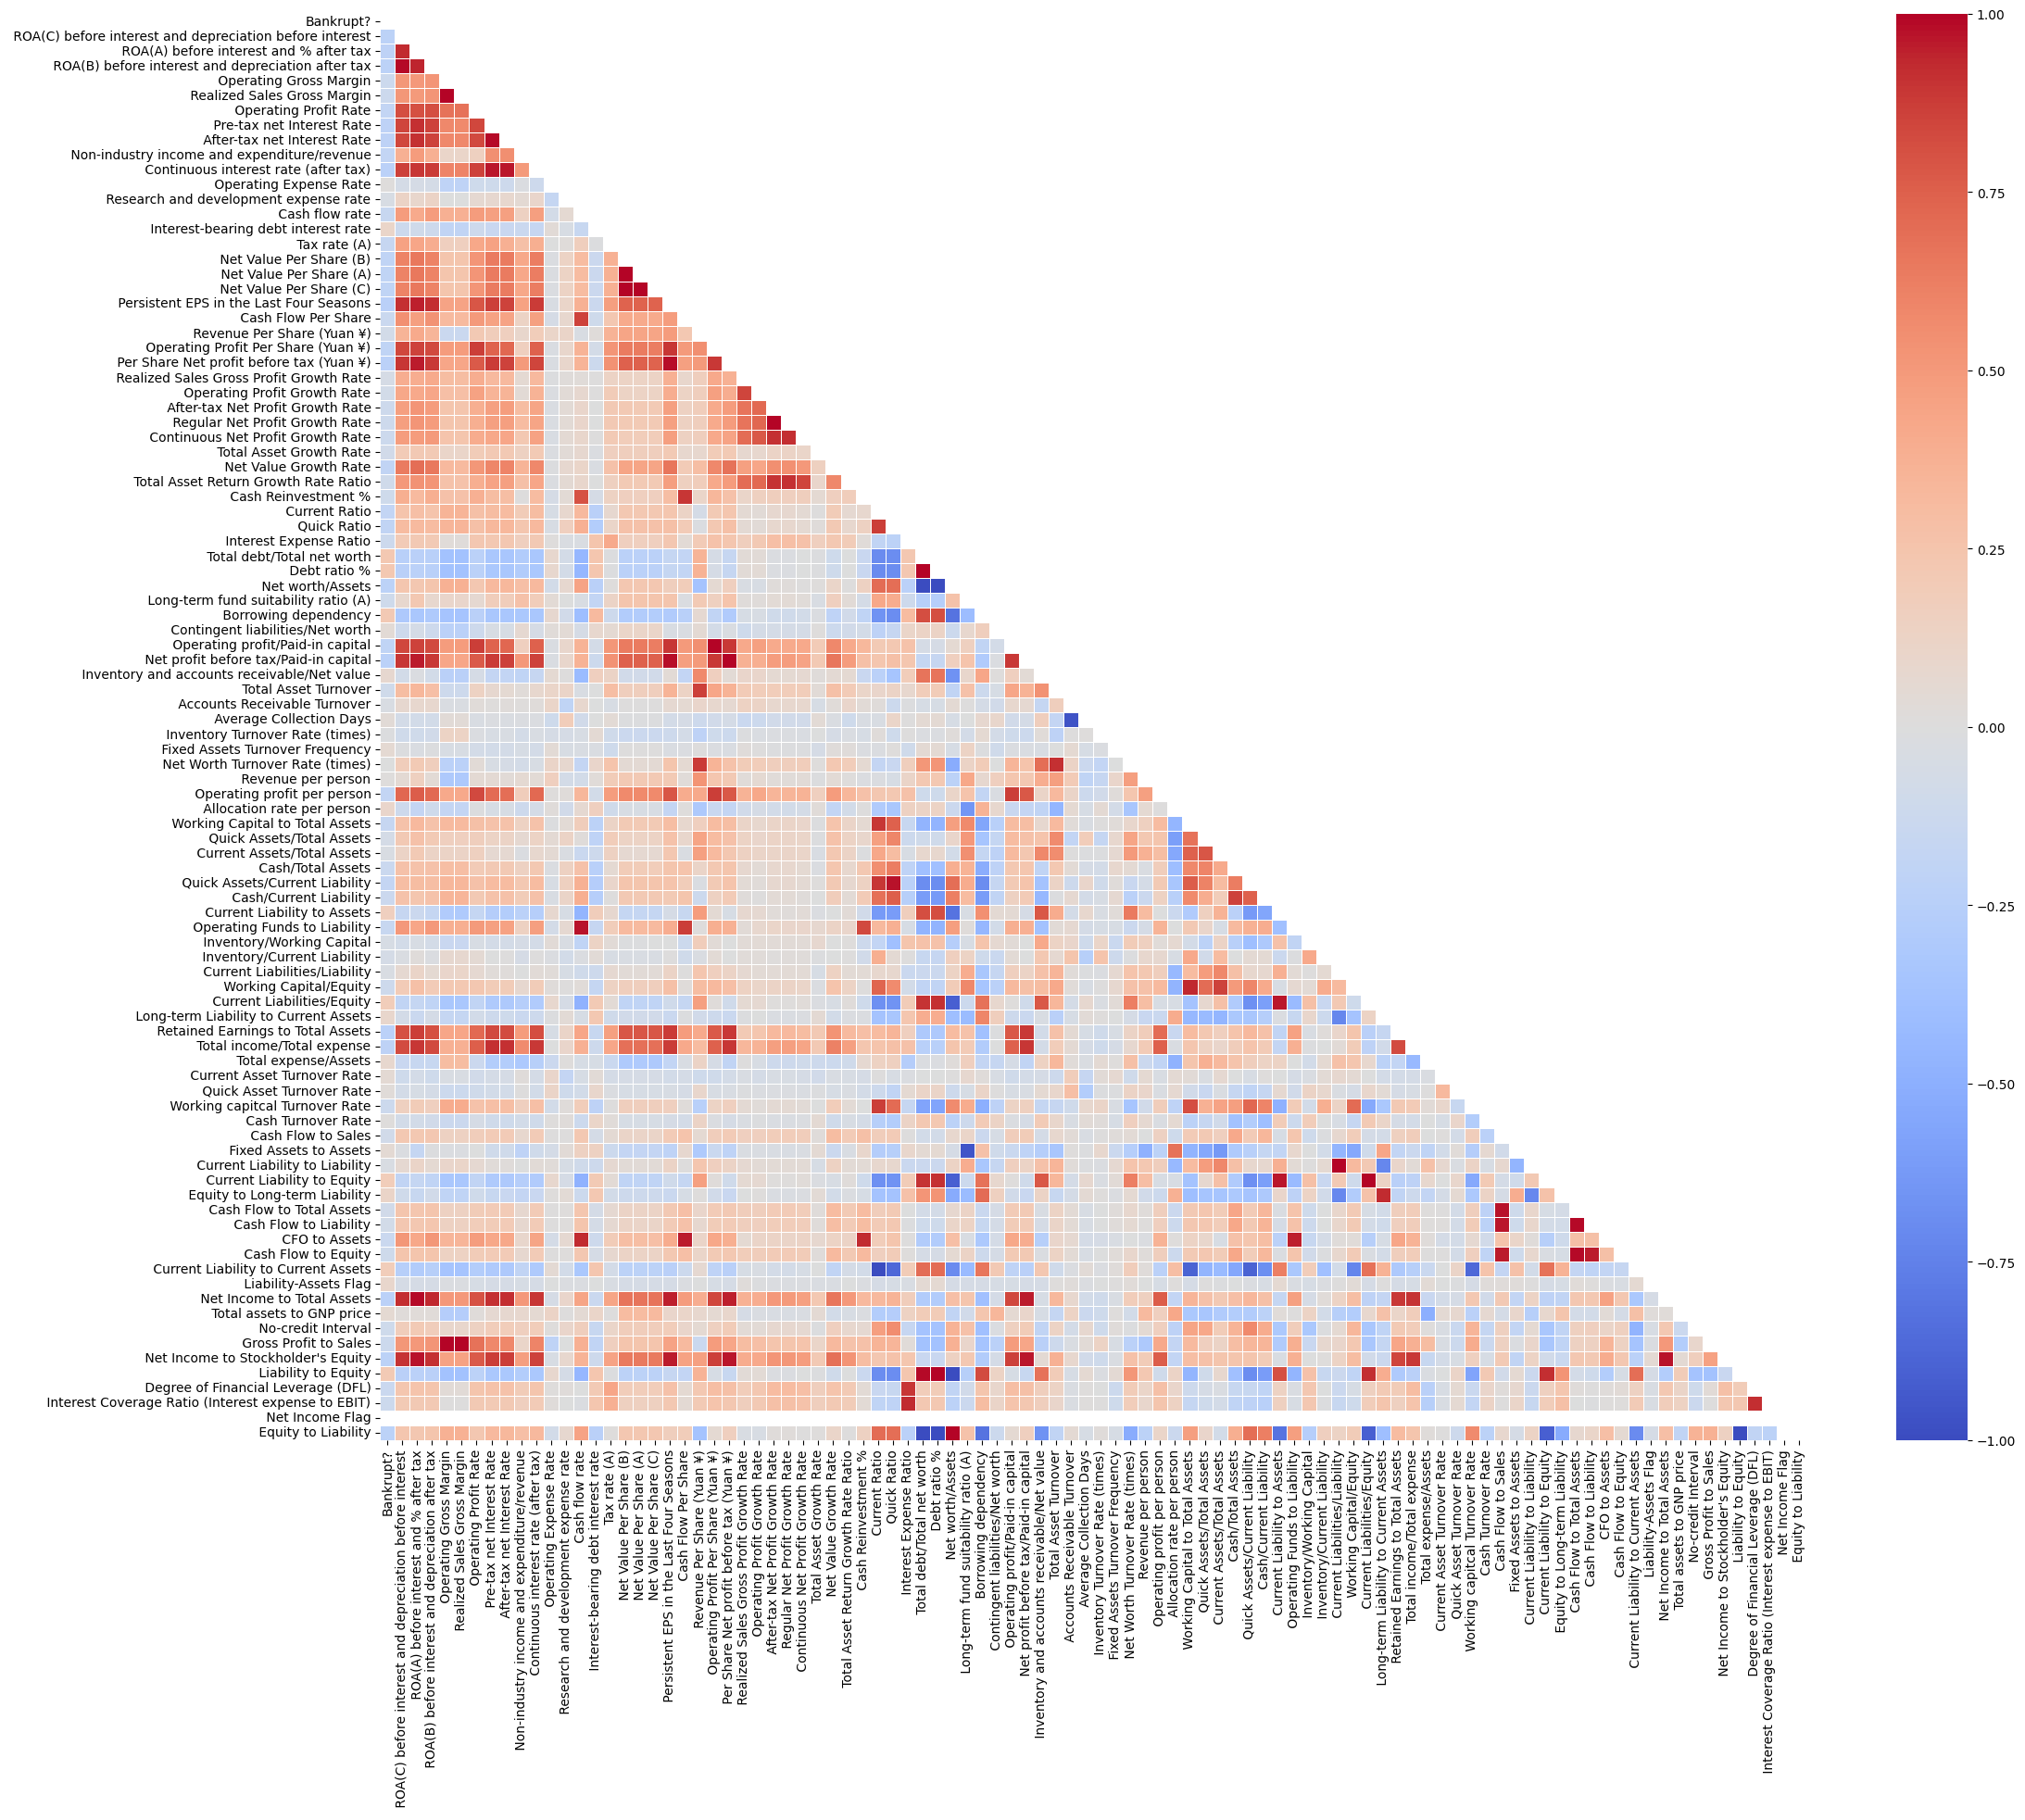

In [38]:
# Heatmap
spearman_corr = db_train.corr('spearman')
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))

plt.figure(figsize=(25, 20))
sns.heatmap(spearman_corr, mask=mask, square=True, linewidths=0.5, cmap='coolwarm')
plt.show()

Wybór kolumn z najbardziej widocznymi zależnościami do dalszych badań korelacji

In [39]:
print(spearman_corr['Bankrupt?'].sort_values(ascending=False).head(15))
print(spearman_corr['Bankrupt?'].sort_values(ascending=False).tail(30))

Bankrupt?                                 1.000000
 Debt ratio %                             0.219221
 Total debt/Total net worth               0.218771
 Borrowing dependency                     0.217057
 Liability to Equity                      0.208247
 Current Liability to Equity              0.185307
 Current Liabilities/Equity               0.185307
 Current Liability to Current Assets      0.180131
 Current Liability to Assets              0.158782
 Equity to Long-term Liability            0.111237
 Interest-bearing debt interest rate      0.101677
 Allocation rate per person               0.094344
 Liability-Assets Flag                    0.091547
 Long-term Liability to Current Assets    0.086399
 Total expense/Assets                     0.083149
Name: Bankrupt?, dtype: float64
 Tax rate (A)                                              -0.163488
 Working Capital to Total Assets                           -0.163958
 Quick Assets/Current Liability                            -0.174

Wizualizacja kilku ciekawych parametrów za pomocą boxplotów

In [ ]:
plt.subplots(ncols=5, figsize=(25,8))

sns.boxplot(x='Bankrupt?', y=" Persistent EPS in the Last Four Seasons", data=db_train, ax=plt.subplot(1, 5, 1))
sns.boxplot(x='Bankrupt?', y=" Net Income to Total Assets", data=db_train, ax=plt.subplot(1, 5, 2))
sns.boxplot(x='Bankrupt?', y=" ROA(B) before interest and depreciation after tax", data=db_train, ax=plt.subplot(1, 5, 3))
sns.boxplot(x='Bankrupt?', y=" Net Value Per Share (B)", data=db_train, ax=plt.subplot(1, 5, 4))
sns.boxplot(x='Bankrupt?', y=" Equity to Long-term Liability", data=db_train, ax=plt.subplot(1, 5, 5))